In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n] / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255

X_train = X_train.astype(np.float32)
Y_train = Y_train.astype(np.int32)
X_dev = X_dev.astype(np.float32)
Y_dev = Y_dev.astype(np.int32)

In [5]:
X_train[:, 0].shape

(784,)

In [6]:
from numpy import exp


def init_params():
    W1 = np.random.randn(256, 784) * 0.01
    B1 = np.random.randn(256, 1) * 0.01
    W2 = np.random.randn(10, 256) * 0.01
    B2 = np.random.randn(10, 1) * 0.01
    return W1, B1, W2, B2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    return exp(Z) / np.sum(exp(Z), axis=0, keepdims=True)

def forward_prop(W1, B1, W2, B2, X):
    Z1 = W1.dot(X) + B1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def derieve_ReLU(Z):
    return Z > 0

def back_prop(A1, Z1, A2, Z2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    dB2 = (1/m) * np.sum(dZ2, axis = 1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * derieve_ReLU(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    dB1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, dB1, dW2, dB2

def update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha):
    W1 = W1 - alpha * dW1
    B1 = B1 - alpha * dB1
    W2 = W2 - alpha * dW2
    B2 = B2 - alpha * dB2
    return W1, B1, W2, B2



In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, B1, W2, B2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, B1, W2, B2, X)
        dW1, dB1, dW2, dB2 = back_prop(A1, Z1, A2, Z2, W2, X, Y)
        W1, B1, W2, B2 = update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)
        if i % 50 == 0:
            print(f"Iteratiopn : {i}")
            print(f"Accuracy : {get_accuracy(get_predictions(A2), Y)}")
    return W1, B1, W2, B2

In [8]:
W1, B1, W2, B2 = gradient_descent(X_train, Y_train, 1500, 0.01)

Iteratiopn : 0
[0 9 8 ... 4 0 7] [1 4 6 ... 4 0 2]
Accuracy : 0.1410731707317073
Iteratiopn : 50
[1 9 6 ... 8 0 0] [1 4 6 ... 4 0 2]
Accuracy : 0.3335609756097561
Iteratiopn : 100
[1 9 6 ... 8 0 0] [1 4 6 ... 4 0 2]
Accuracy : 0.45446341463414636
Iteratiopn : 150
[1 8 0 ... 8 0 0] [1 4 6 ... 4 0 2]
Accuracy : 0.5043414634146342
Iteratiopn : 200
[1 8 0 ... 8 0 0] [1 4 6 ... 4 0 2]
Accuracy : 0.5382439024390244
Iteratiopn : 250
[1 8 0 ... 8 0 0] [1 4 6 ... 4 0 2]
Accuracy : 0.5627073170731707
Iteratiopn : 300
[1 8 0 ... 8 0 2] [1 4 6 ... 4 0 2]
Accuracy : 0.589170731707317
Iteratiopn : 350
[1 8 0 ... 9 0 2] [1 4 6 ... 4 0 2]
Accuracy : 0.621390243902439
Iteratiopn : 400
[1 9 6 ... 9 0 2] [1 4 6 ... 4 0 2]
Accuracy : 0.6549512195121951
Iteratiopn : 450
[1 9 6 ... 9 0 2] [1 4 6 ... 4 0 2]
Accuracy : 0.6822682926829269
Iteratiopn : 500
[1 9 6 ... 9 0 2] [1 4 6 ... 4 0 2]
Accuracy : 0.6977073170731707
Iteratiopn : 550
[1 9 6 ... 9 0 2] [1 4 6 ... 4 0 2]
Accuracy : 0.7082439024390244
Iteratio

In [9]:
def make_predictions(X, W1, B1, W2, B2):
    _, _, _, A2 = forward_prop(W1, B1, W2, B2, X)
    predictions = get_predictions(A2)
    return predictions

def test_predictions(index, W1, B1, W2, B2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, B1, W2, B2)
    label = Y_train[index]
    print(f"Prediction : {prediction}")
    print(f"Label : {label}")
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
    

Prediction : [5]
Label : 6


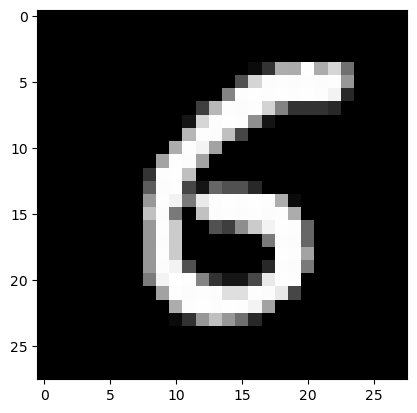

In [23]:
test_predictions(178, W1, B1, W2, B2)

In [24]:
dev_predictions = make_predictions(X_dev, W1, B1, W2, B2)
get_accuracy(dev_predictions, Y_dev)

[1 4 3 9 9 4 3 1 9 9 8 1 7 3 6 6 0 0 2 1 6 4 9 3 5 9 3 3 6 6 4 2 4 7 4 9 7
 2 3 1 5 0 3 4 7 1 2 9 3 2 4 4 3 5 8 6 7 5 7 5 4 7 4 8 7 6 9 0 1 3 5 1 6 2
 4 9 5 1 8 8 0 9 3 6 2 8 7 5 3 1 2 5 9 1 0 7 5 8 7 3 6 6 5 1 7 3 7 1 0 1 1
 1 1 7 7 1 4 6 5 2 2 2 5 7 7 6 5 3 7 8 5 6 2 4 8 1 5 8 0 7 2 8 3 0 9 2 9 2
 2 3 1 9 2 2 6 0 1 5 2 9 7 8 7 4 2 1 9 7 5 3 8 1 6 1 3 2 9 3 7 3 9 0 7 2 6
 8 1 5 9 4 5 3 2 8 1 1 8 0 3 5 1 7 2 0 6 2 8 4 6 7 3 6 8 3 6 6 1 7 8 1 0 8
 4 0 6 9 5 4 0 9 9 4 6 2 4 5 8 5 3 7 8 4 9 7 3 6 5 2 2 6 0 6 0 7 1 6 9 4 6
 4 6 7 1 0 4 8 3 7 7 0 7 7 0 4 1 5 6 3 4 5 0 1 4 7 7 3 4 5 5 3 0 1 3 4 7 3
 1 4 6 0 4 8 6 9 1 4 1 9 6 7 7 5 6 6 0 8 6 6 0 1 1 4 4 7 5 4 6 5 0 8 7 5 7
 1 6 8 8 3 2 2 9 7 0 2 2 0 1 1 4 9 5 0 8 9 6 6 4 4 2 5 2 3 6 9 3 4 7 4 0 4
 3 2 2 9 2 8 6 5 1 8 3 1 1 5 5 8 8 0 3 5 9 7 4 8 6 3 9 4 5 9 3 8 2 4 5 4 7
 7 6 3 3 9 5 1 4 4 4 8 6 5 5 7 2 1 8 6 9 8 8 1 4 1 9 7 9 3 0 3 3 9 7 4 9 9
 7 3 9 9 7 0 9 0 9 8 0 4 6 3 3 2 0 8 4 8 2 7 7 0 7 3 4 7 7 5 6 0 0 4 2 6 0
 6 7 5 5 8 2 6 4 8 4 5 0 

0.863